# Лабораторная работа №3
-----------------------
**Частотный анализ**

----------------------- 

## Цель:
Ознакомиться с методами частотного анализа из библиотеки MLxtend

## Выполнение

### imports

In [1]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
data_frame = pd.read_csv('dataset_group.csv', header=None, names=['date', 'transaction_id', 'product'])
data_frame

,date,transaction_id,product
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


Количество транзакций

In [3]:
unique_ids = data_frame["transaction_id"].unique()
len(unique_ids)

1139

Количество продуктов

In [4]:
items = data_frame["product"].unique()
len(items)

38

Переформировать данные. Где каждая транзацкия представлена как одно наблюдение.

In [23]:
dataset = [[elem for elem in data_frame[data_frame["transaction_id"] == id]["product"] if elem in items] for id in unique_ids]
print(pd.DataFrame(dataset, index=unique_ids))

                   0                  1              2                3   \
1              yogurt               pork  sandwich bags       lunch meat   
2        toilet paper            shampoo      hand soap          waffles   
3                soda               pork           soap        ice cream   
4             cereals              juice     lunch meat             soda   
5     sandwich loaves              pasta      tortillas            mixes   
...               ...                ...            ...              ...   
1135            sugar               beef  sandwich bags        hand soap   
1136       coffee/tea       dinner rolls     lunch meat  spaghetti sauce   
1137             beef         lunch meat           eggs          poultry   
1138    sandwich bags            ketchup           milk          poultry   
1139             soda  laundry detergent     vegetables          shampoo   

                4             5             6                7   \
1     all- purpose  

### Подготовка данных

Преобразовать данные так, что для каждой транзакции было указано, как из возжможных товаров куплены.

In [6]:
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


### Ассоциативный анализ с использованием алгоритма Apriori

Получены часто встречающиеся наборы товаров с минимальным уровнем поддержки 0.3. Товар куплен в не менее, чем 30% транзакций. Минимальный размер набора товаров - 1, максимальный - 2.

In [25]:
results = apriori(df, min_support=0.3, use_colnames=True)
# results['length'] = results['itemsets'].apply(lambda x: len(x))
results
# print(results)

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Ограничение максимального размера набора до 1.

In [26]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Наборы из двух элементов при уровне поддержки 0.3

In [9]:
results = apriori(df, min_support=0.3, use_colnames=True)
results = results[results['itemsets'].apply(lambda x: len(x) == 2)]
print(len(results))
results

14


,support,itemsets
38,0.310799,"(vegetables, aluminum foil)"
39,0.300263,"(bagels, vegetables)"
40,0.310799,"(vegetables, cereals)"
41,0.309043,"(vegetables, cheeses)"
42,0.308165,"(vegetables, dinner rolls)"
43,0.306409,"(dishwashing liquid/detergent, vegetables)"
44,0.326602,"(vegetables, eggs)"
45,0.302897,"(vegetables, ice cream)"
46,0.309043,"(laundry detergent, vegetables)"
47,0.311677,"(vegetables, lunch meat)"


Зависимость количество наборов от уровня поддержки [0.05, 1]

На графике отмечены точки, при которых перестают генерироваться наборы указанной длины

no more (4):  0.09000000000000001
no more (3):  0.17000000000000004
no more (2):  0.34


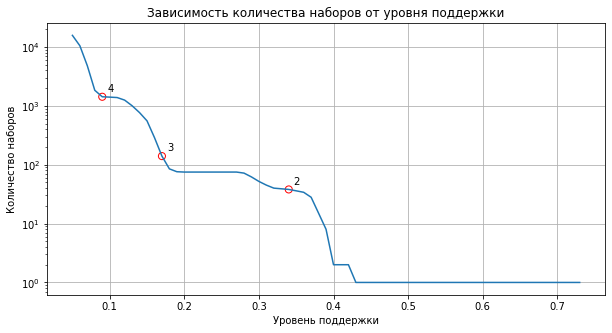

In [28]:
plt.figure(figsize=(10, 5))
plt.yscale("log", base=10)
plt.grid(True, axis="both")

min_supports = np.arange(0.05, 1, 0.01)
items_set_count = np.array([])
max_len_prev = None
for min_support in min_supports:
    results = apriori(df, min_support=min_support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    
    max_len_curr = np.max(results['length'])
    if (np.isnan(max_len_curr)):
        break
    
    max_len_prev = max_len_prev if max_len_prev else max_len_curr
    items_set_count = np.append(items_set_count, len(results))

    if (max_len_prev != max_len_curr):
        print(f"no more ({max_len_prev}): ", min_support)
        plt.scatter(min_support, len(results), s=50, facecolors="None", edgecolors="r")
        plt.annotate(text=max_len_prev, xy=(min_support, len(results)), xytext=(5, 5), textcoords="offset pixels")
        max_len_prev = max_len_curr
    
plt.plot(min_supports[:len(items_set_count)], items_set_count)
plt.title('Зависимость количества наборов от уровня поддержки')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.show()

Создание датасета из элементов, которые имеют поддержку более 0.38

In [11]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in data_frame[data_frame["transaction_id"] == id]["product"] if elem in new_items] for id in unique_ids]

In [12]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


Ассоциативный анализ полученного датасета

In [29]:
results = apriori(new_df, min_support=0.3, use_colnames=True)
# results['length'] = results['itemsets'].apply(lambda x: len(x))
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Поиск наборов, которые содержат *yogurt* и *waffles* при поддержке 0.15

In [14]:
results = apriori(new_df, min_support=0.15, use_colnames=True)
results = results[results['itemsets'].apply(lambda iset: len(iset) > 1 and ('yogurt' in iset or 'waffles' in iset))]
results


,support,itemsets
27,0.169447,"(waffles, aluminum foil)"
28,0.177349,"(yogurt, aluminum foil)"
40,0.159789,"(bagels, waffles)"
41,0.162423,"(bagels, yogurt)"
52,0.160667,"(waffles, cereals)"
53,0.172081,"(yogurt, cereals)"
63,0.172959,"(waffles, cheeses)"
64,0.172081,"(yogurt, cheeses)"
73,0.169447,"(dinner rolls, waffles)"
74,0.166813,"(dinner rolls, yogurt)"


Создание датасета с продуктами, у которых поддержка менее 38

In [15]:
diff_items = set(list(df)) - set(list(new_df))
diff_dataset = [[elem for elem in data_frame[data_frame["transaction_id"] == id]["product"] if elem in diff_items] for id in unique_ids]
te = TransactionEncoder()
te_ary = te.fit_transform(diff_dataset)
diff_df = pd.DataFrame(te_ary, columns=te.columns_)
diff_df

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


Проведение ассоциативного анализа при поддержке 0.3

In [16]:
results = apriori(diff_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


Вывести те наборы, у которых хотя бы два продукта начинаются на букву *s*

In [17]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['itemsets'].apply(lambda iset: len([item for item in iset if item.startswith('s')]) >= 2)]
results

,support,itemsets
675,0.137840,"(sandwich bags, sandwich loaves)"
676,0.146620,"(sandwich bags, shampoo)"
677,0.158911,"(soap, sandwich bags)"
678,0.162423,"(soda, sandwich bags)"
679,0.147498,"(sandwich bags, spaghetti sauce)"
680,0.131694,"(sandwich bags, sugar)"
686,0.150132,"(shampoo, sandwich loaves)"
687,0.158033,"(soap, sandwich loaves)"
688,0.141352,"(soda, sandwich loaves)"
689,0.150132,"(sandwich loaves, spaghetti sauce)"


Ввести наборы с поддержкой от 0.1 до 0.25

In [18]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['support'].apply(lambda sprt: sprt >= 0.1 and sprt <= 0.25)]

results

,support,itemsets
38,0.157155,"(all- purpose, aluminum foil)"
39,0.150132,"(bagels, all- purpose)"
40,0.144864,"(beef, all- purpose)"
41,0.147498,"(butter, all- purpose)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(vegetables, waffles, toilet paper)"
1402,0.130817,"(vegetables, yogurt, toilet paper)"
1403,0.121159,"(tortillas, vegetables, waffles)"
1404,0.130817,"(tortillas, vegetables, yogurt)"
